In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.rename(columns={'v1':'Tag','v2':'Message'},inplace=True)

In [4]:
df

,Tag,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df1=df[['Tag','Message']]
df1

,Tag,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df1.shape

(5572, 2)

In [7]:
df1.isnull().sum()

Tag        0
Message    0
dtype: int64

In [8]:
df1.duplicated().sum()

403

In [9]:
df1.drop_duplicates(inplace=True)

C:\Users\MOHIT\AppData\Local\Temp\ipykernel_5100\4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [10]:
df1.shape

(5169, 2)

Tag
ham     4516
spam     653
Name: count, dtype: int64


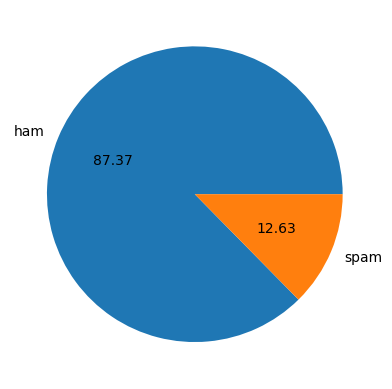

In [11]:
print(df1['Tag'].value_counts())
plt.pie(df1['Tag'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [12]:
encoder=LabelEncoder()
df1['Tag']=encoder.fit_transform(df1['Tag'])
df1.head()

C:\Users\MOHIT\AppData\Local\Temp\ipykernel_5100\3082028609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tag']=encoder.fit_transform(df1['Tag'])


,Tag,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
x = df1['Message']
y = df1["Tag"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [14]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

In [15]:
features.shape

(4135, 7645)

In [16]:
model = svm.SVC()
model.fit(features,y_train)
features_test = cv.transform(x_test)
print(model.score(features_test,y_test))

0.9758220502901354


In [17]:
clf = MultinomialNB()
clf.fit(features, y_train)
features_test = cv.transform(x_test)
clf.score(features_test,y_test)

0.9854932301740812

<Axes: >

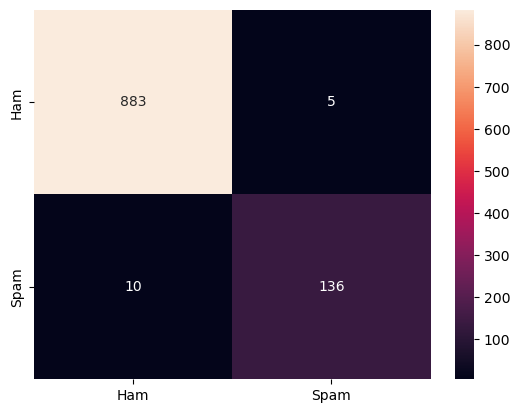

In [18]:
x_test_counts = cv.transform(x_test)
predictions = clf.predict(x_test_counts)
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])

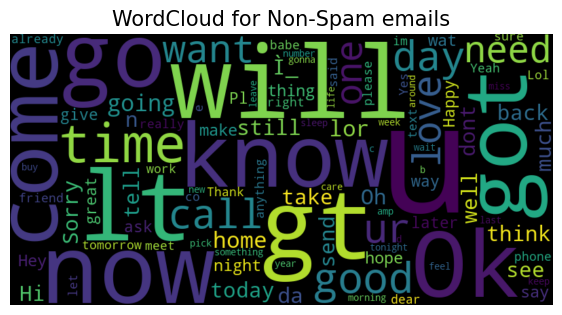

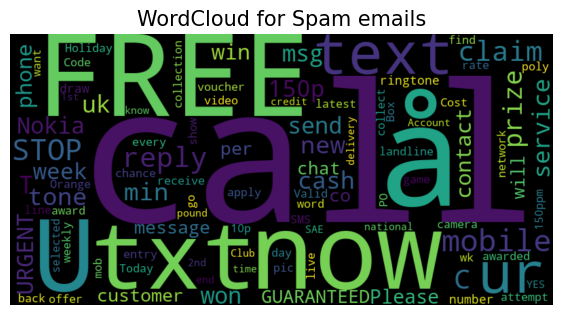

In [19]:
from wordcloud import WordCloud
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['Message'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(df1[df1['Tag'] == 0], typ='Non-Spam')
plot_word_cloud(df1[df1['Tag'] == 1], typ='Spam')